In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# df = pd.read_csv("complete_data_v2.csv")
df = pd.read_excel("hasil_cluster_v2.xlsx")
df.sample(10)

,tanggal,jam,timestamps,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,...,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance,Cluster_Maintenance
3765,3/23/2023,15:30,2023-03-23 15:30:00,19,2.20,130,3.30,48,380,750,...,1,1,0,0,0,1,0,0,0,0
5182,4/21/2023,2:30,2023-04-21 02:30:00,19,2.30,130,3.20,48,380,750,...,1,1,1,0,0,1,0,0,0,0
5612,4/30/2023,1:00,2023-04-30 01:00:00,16,3.00,135,3.00,50,380,700,...,0,0,1,1,0,1,0,0,0,0
5462,4/27/2023,22:30,2023-04-27 22:30:00,19,3.00,135,3.30,46,380,800,...,0,0,0,0,0,0,0,0,0,0
3841,3/24/2023,5:00,2023-03-24 05:00:00,17,2.00,130,3.30,44,380,400,...,1,1,0,0,0,1,0,0,0,1
4831,4/14/2023,19:00,2023-04-14 19:00:00,18,2.70,135,3.30,48,380,600,...,1,0,0,0,0,1,0,0,0,0
4467,4/6/2023,5:00,2023-04-06 05:00:00,10,1.50,125,3.30,48,380,800,...,1,1,0,0,0,0,0,0,0,0
2832,3/3/2023,6:00,2023-03-03 06:00:00,18,2.60,130,3.20,44,380,800,...,1,1,1,0,0,0,0,0,0,0
2716,3/1/2023,20:30,2023-03-01 20:30:00,16,1.50,125,3.20,50,380,800,...,1,1,1,1,0,0,0,0,0,0
1231,1/29/2023,22:00,2023-01-29 22:00:00,19,2.20,130,3.30,48,380,850,...,1,1,0,0,0,0,0,0,0,0


### Descriptive Analysis

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tanggal                             5626 non-null   object        
 1   jam                                 5626 non-null   object        
 2   timestamps                          5626 non-null   datetime64[ns]
 3   tekanan_uap_masuk                   5626 non-null   int64         
 4   tekanan_uap_bekas                   5626 non-null   float64       
 5   temp_uap_bekas                      5626 non-null   int64         
 6   tekanan_oli                         5626 non-null   float64       
 7   temp_cooling_water_keluar           5626 non-null   int64         
 8   voltase                             5626 non-null   int64         
 9   ampere                              5626 non-null   int64         
 10  cos_p                   

In [153]:
df.describe()

,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,cos_p,frekuensi,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance,Cluster_Maintenance
count,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00,5626.00
mean,17.60,2.59,133.40,3.27,45.77,378.01,740.01,0.82,49.72,0.40,0.49,0.34,0.26,0.07,0.07,0.25,0.00,0.08,0.06,0.07
std,2.58,0.55,27.26,0.06,4.80,7.79,170.49,0.04,1.03,0.49,0.50,0.48,0.44,0.26,0.26,0.43,0.02,0.27,0.23,0.25
min,8.00,0.80,30.00,2.80,4.00,350.00,65.00,0.80,4.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,2.20,130.00,3.20,46.00,380.00,780.00,0.80,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,19.00,3.00,135.00,3.30,48.00,380.00,800.00,0.80,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,19.00,3.00,135.00,3.30,48.00,380.00,800.00,0.80,50.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,19.00,5.00,1303.00,3.50,58.00,390.00,900.00,1.78,55.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [154]:
df.nunique()

tanggal                                117
jam                                     63
timestamps                            5622
tekanan_uap_masuk                       11
tekanan_uap_bekas                       23
temp_uap_bekas                           7
tekanan_oli                              6
temp_cooling_water_keluar               21
voltase                                  4
ampere                                  20
cos_p                                    6
frekuensi                               11
tekanan_uap_masuk_abnormal               2
tekanan_uap_bekas_abnormal               2
temp_uap_bekas_abnormal                  2
tekanan_oli_abnormal                     2
temp_cooling_water_keluar_abnormal       2
voltase_abnormal                         2
ampere_abnormal                          2
cos_p_abnormal                           2
frekuensi_abnormal                       2
Maintenance                              2
Cluster_Maintenance                      2
dtype: int6

### Pemisahan data Feature dan Data Label

In [155]:
label = df['Cluster_Maintenance']
data = df[df.columns[3:-2]]
data

,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,cos_p,frekuensi,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal
0,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0
1,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0
2,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0
3,16,2.00,130,3.30,38,380,400,0.80,48.00,1,1,1,0,0,0,1,0,1
4,19,1.80,130,3.30,40,380,400,0.80,49.00,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,11,1.20,125,3.20,30,350,400,0.80,47.00,1,1,1,1,0,1,1,0,1
5622,18,1.40,125,3.20,30,350,400,0.80,50.00,1,1,1,1,0,1,1,0,0
5623,10,5.00,125,3.20,30,350,400,0.80,51.00,1,1,1,1,0,1,1,0,0
5624,10,1.20,125,3.20,30,350,400,0.80,52.00,1,1,1,1,0,1,1,0,1


### Cek Keadaan Class

0    5242
1     384
Name: Cluster_Maintenance, dtype: int64


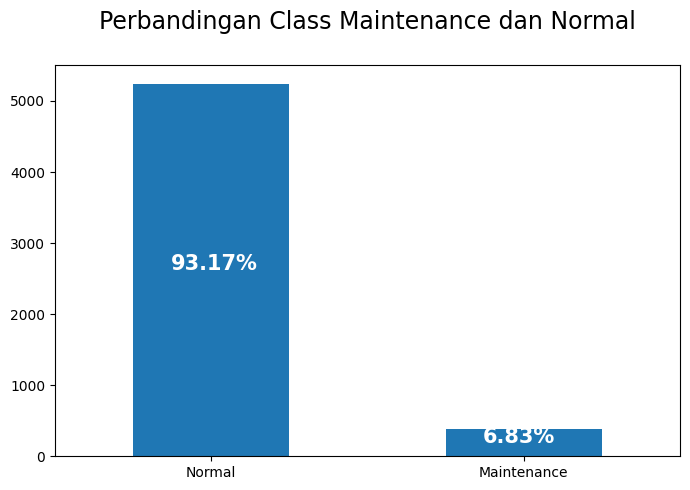

In [156]:
import matplotlib.pyplot as plt
# Cek keadaan kelas
print(label.value_counts())

# Plot dengan presentase
fig, ax = plt.subplots(figsize=(7,5))
name = ['Normal', 'Maintenance']
ax = label.value_counts().plot(kind='bar')
ax.set_title('Perbandingan Class Maintenance dan Normal\n', fontsize = 17)
ax.set_xticklabels (name, rotation = 0)

# menghitung presentase
totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:  
  ax.text(i.get_x()+0.12, i.get_height()-i.get_height()/2, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
          color='white', weight = 'bold')    
plt.tight_layout()

### Cek Feature Important

In [157]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=550,
                          random_state=123)
clf = clf.fit(data, label)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(data)
X_new.shape

(5626, 6)

In [158]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [159]:
# Print the feature ranking
print("Feature ranking")

for f in range(X_new.shape[1]):
    print(f"%d. feature %d {data.columns[indices[f]]} (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking
1. feature 6 ampere (0.292061)
2. feature 14 voltase_abnormal (0.145865)
3. feature 17 frekuensi_abnormal (0.107196)
4. feature 5 voltase (0.105232)
5. feature 4 temp_cooling_water_keluar (0.094425)
6. feature 0 tekanan_uap_masuk (0.069717)


### Cek Outlier

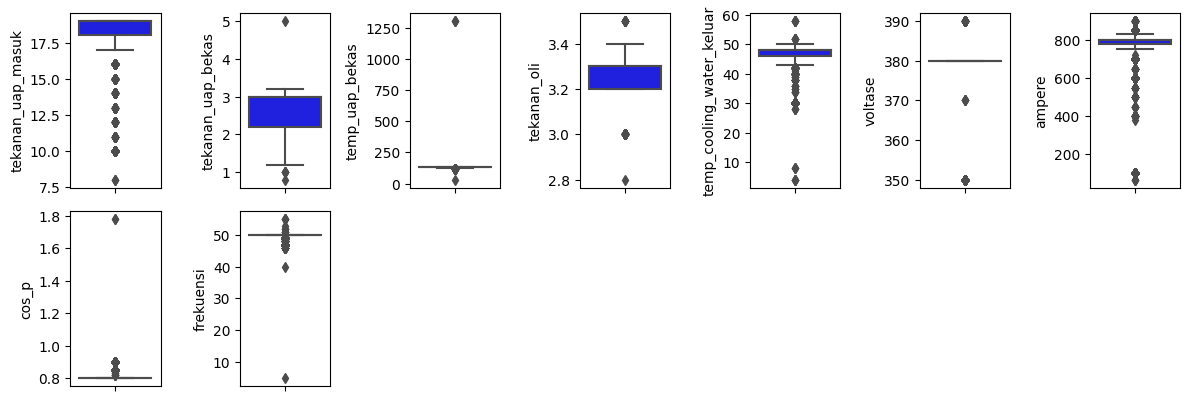

In [160]:
col = data.iloc[:,:9].columns
plt.figure(figsize=(12, 12))
for i in range(0, len(col)):
    plt.subplot(6, 7, i+1)
    sns.boxplot(y=data[col[i]], color='blue', orient='v')
    plt.tight_layout()

In [161]:
# cek jumlah outlier untuk tiap atribut numerik

print('Jumlah Outlier Awal')
for i in col:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  otl = abs(data[data[i] < (Q1 - 1.5 * IQR)].shape[0])+abs(data[data[i]>(Q3 + 1.5 * IQR)].shape[0])    
  print(i, ': %1d outlier data (%.2f'%(otl, otl/data.shape[0]*100)+'%)')

Jumlah Outlier Awal
tekanan_uap_masuk : 946 outlier data (16.81%)
tekanan_uap_bekas : 7 outlier data (0.12%)
temp_uap_bekas : 39 outlier data (0.69%)
tekanan_oli : 117 outlier data (2.08%)
temp_cooling_water_keluar : 692 outlier data (12.30%)
voltase : 473 outlier data (8.41%)
ampere : 1473 outlier data (26.18%)
cos_p : 1079 outlier data (19.18%)
frekuensi : 717 outlier data (12.74%)


### Transformasi Data

> Pada tahap sebelumnya diketahui bahwa banyak terdapat ***Outlier*** pada data. Untuk itu, akan dilakukan **Transformasi Data** agar jumlah ***Outlier*** berkurang dan distribusi data lebih baik. Tahapannya:  
1. _Robust Scaling_, _scaling_ untuk menangani ***Outlier*** pada data dengan menggunakan _Quantile 1_ dan _Quantile 3_.
2. _Power Transform Scaling_, _scaling_ untuk membuat distribusi data menjadi lebih _Gaussian_ agar dapat digunakan lebih baik pada model nantinya.
3. _Min-Max Scaling_ _scaling_ untuk menyamakan batas menjadi diantara **0 - 1**.

In [10]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

robust_trans = RobustScaler(quantile_range=(25, 75))
mm_trans = MinMaxScaler()
power_trans = PowerTransformer()

for i in col:    
  data[i] = robust_trans.fit_transform(data[[i]])
  data[i] = power_trans.fit_transform(data[[i]])  
  data[i] = mm_trans.fit_transform(data[[i]])    

/tmp/ipykernel_254896/2956559373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = robust_trans.fit_transform(data[[i]])
/tmp/ipykernel_254896/2956559373.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = power_trans.fit_transform(data[[i]])
/tmp/ipykernel_254896/2956559373.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
## Simpan Scaler
import joblib
scaler_robust = "model/predictive_maintenance/robust_scaler.save"
scaler_power = "model/predictive_maintenance/powertransformer_scaler.save"
scaler_mm = "model/predictive_maintenance/minmax_scaler.save"
joblib.dump(robust_trans, scaler_robust)
joblib.dump(power_trans, scaler_power)
joblib.dump(mm_trans, scaler_mm)

In [11]:
# cek jumlah outlier untuk tiap atribut numerik

print('Jumlah Outlier Setelah Transformasi Data')
for i in col:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  otl = abs(data[data[i] < (Q1 - 1.5 * IQR)].shape[0])+abs(data[data[i]>(Q3 + 1.5 * IQR)].shape[0])    
  print(i, ': %1d outlier data (%.2f'%(otl, otl/data.shape[0]*100)+'%)')

Jumlah Outlier Setelah Transformasi Data
tekanan_uap_masuk : 0 outlier data (0.00%)
tekanan_uap_bekas : 1 outlier data (0.02%)
temp_uap_bekas : 39 outlier data (0.69%)
tekanan_oli : 73 outlier data (1.30%)
temp_cooling_water_keluar : 927 outlier data (16.48%)
voltase : 473 outlier data (8.41%)
ampere : 1483 outlier data (26.36%)
cos_p : 1079 outlier data (19.18%)
frekuensi : 717 outlier data (12.74%)


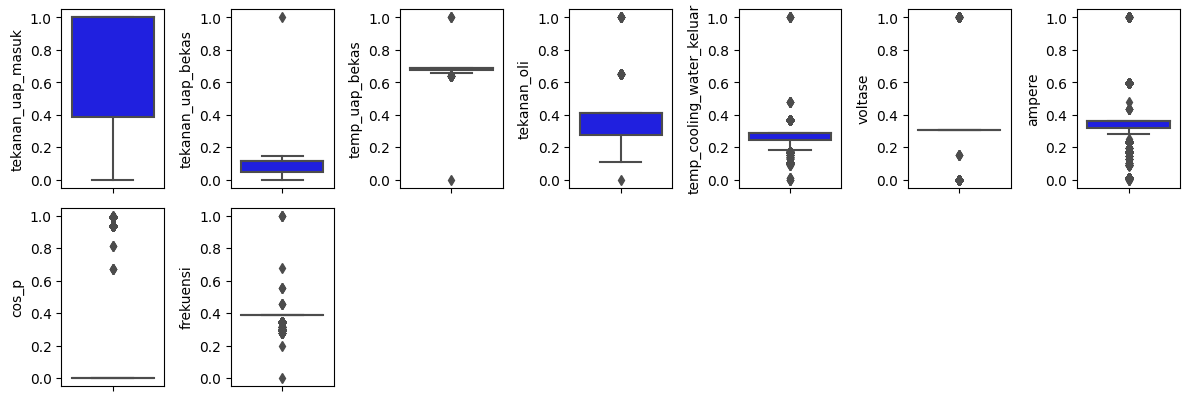

In [12]:
plt.figure(figsize=(12, 12))
for i in range(0, len(col)):
    plt.subplot(6, 7, i+1)
    sns.boxplot(y=data[col[i]], color='blue', orient='v')
    plt.tight_layout()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(data, label, stratify=label, test_size=0.1, random_state=42)

In [15]:
## Optional

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_latih = scaler.transform(X_train)
X_validasi = scaler.transform(X_val)

In [17]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [22]:
# Defining parameters for lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

100%|███████████████████████████████████████████| 29/29 [00:02<00:00, 10.94it/s]


In [23]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.08
LabelPropagation,1.00,1.00,1.00,1.00,0.42
XGBClassifier,1.00,1.00,1.00,1.00,0.11
SVC,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.11
Perceptron,1.00,1.00,1.00,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.02


In [24]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.08
LabelPropagation,1.00,1.00,1.00,1.00,0.42
XGBClassifier,1.00,1.00,1.00,1.00,0.11
SVC,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.11
Perceptron,1.00,1.00,1.00,1.00,0.01
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.03
BaggingClassifier,1.00,1.00,1.00,1.00,0.02


> Kita pilih Model Decision Tree sebagai model utama karena ringan dan akurasinya bagus

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_models = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_models.predict(X_val)

In [30]:
## Akurasi Dengan Data Label Manual

from sklearn.metrics import classification_report

target_names = ['Normal', 'Maintenance']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       531
 Maintenance       1.00      1.00      1.00        32

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



In [109]:
## Akurasi Dengan Data Label Clustering

from sklearn.metrics import classification_report

target_names = ['Normal', 'Maintenance']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       525
 Maintenance       1.00      1.00      1.00        38

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



### Save & Load Model

In [110]:
import joblib
joblib.dump(clf, 'model/predictive_maintenance/DT_PredictiveMaintenance.joblib')
# clf = joblib.load('DT_PredictiveMaintenance.joblib')

['model/predictive_maintenance/DT_PredictiveMaintenance.joblib']

### Predict

In [ ]:
contoh_robust_trans = robust_trans.transform(X_val.iloc[-1,:-1].values.reshape((-1,1)))
contoh_mm_trans = mm_trans.transform(contoh_robust_trans)
contoh_power_trans = power_trans.transform(contoh_mm_trans)

In [ ]:
dt_models.predict(contoh_power_trans.reshape((-1, 18)))

## Data Type 2

In [103]:
df = pd.read_excel("hasil_cluster_v2.xlsx")
df.sample(10)

,tanggal,jam,timestamps,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,...,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance,Cluster_Maintenance
835,1/21/2023,15:00,2023-01-21 15:00:00,18,2.90,135,3.30,50,380,800,...,1,0,0,1,0,0,0,0,0,0
2973,3/6/2023,4:30,2023-03-06 04:30:00,19,1.70,130,3.20,40,380,800,...,1,1,1,0,0,0,0,0,0,0
3123,3/10/2023,8:30,2023-03-10 08:30:00,19,3.00,135,3.30,48,380,800,...,0,0,0,0,0,0,0,0,0,0
4917,4/16/2023,14:00,2023-04-16 14:00:00,17,3.00,135,3.30,48,380,750,...,0,0,0,0,0,1,0,0,0,0
992,1/24/2023,22:30,2023-01-24 22:30:00,18,3.00,135,3.30,46,380,800,...,0,0,0,0,0,0,0,0,0,0
4279,4/2/2023,7:00,2023-04-02 07:00:00,19,3.00,135,3.30,44,380,800,...,0,0,0,0,0,0,0,0,0,0
752,1/19/2023,20:30,2023-01-19 20:30:00,18,3.00,135,3.30,46,380,800,...,0,0,0,0,0,0,0,0,0,0
3019,3/7/2023,3:30,2023-03-07 03:30:00,10,1.20,125,3.20,30,350,100,...,1,1,1,0,1,1,0,1,1,1
4609,4/9/2023,4:00,2023-04-09 04:00:00,19,3.00,135,3.30,48,380,800,...,0,0,0,0,0,0,0,0,0,0
1280,1/30/2023,22:30,2023-01-30 22:30:00,19,3.00,135,3.30,48,380,800,...,0,0,0,0,0,0,0,0,0,0


In [104]:
label = df['Cluster_Maintenance']
data = df[df.columns[3:-1]]
data

,tekanan_uap_masuk,tekanan_uap_bekas,temp_uap_bekas,tekanan_oli,temp_cooling_water_keluar,voltase,ampere,cos_p,frekuensi,tekanan_uap_masuk_abnormal,tekanan_uap_bekas_abnormal,temp_uap_bekas_abnormal,tekanan_oli_abnormal,temp_cooling_water_keluar_abnormal,voltase_abnormal,ampere_abnormal,cos_p_abnormal,frekuensi_abnormal,Maintenance
0,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0,0
1,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0,0
2,19,3.00,135,3.30,48,380,800,0.80,50.00,0,0,0,0,0,0,0,0,0,0
3,16,2.00,130,3.30,38,380,400,0.80,48.00,1,1,1,0,0,0,1,0,1,0
4,19,1.80,130,3.30,40,380,400,0.80,49.00,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,11,1.20,125,3.20,30,350,400,0.80,47.00,1,1,1,1,0,1,1,0,1,1
5622,18,1.40,125,3.20,30,350,400,0.80,50.00,1,1,1,1,0,1,1,0,0,1
5623,10,5.00,125,3.20,30,350,400,0.80,51.00,1,1,1,1,0,1,1,0,0,1
5624,10,1.20,125,3.20,30,350,400,0.80,52.00,1,1,1,1,0,1,1,0,1,1


In [105]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

col = data.iloc[:,:9].columns

robust_trans = RobustScaler(quantile_range=(25, 75))
mm_trans = MinMaxScaler()
power_trans = PowerTransformer()

for i in col:    
  data[i] = robust_trans.fit_transform(data[[i]])
  data[i] = power_trans.fit_transform(data[[i]])  
  data[i] = mm_trans.fit_transform(data[[i]])    

In [106]:
import joblib
scaler_robust = "model/predictive_maintenance/robust_scaler.save"
scaler_power = "model/predictive_maintenance/powertransformer_scaler.save"
scaler_mm = "model/predictive_maintenance/minmax_scaler.save"
joblib.dump(robust_trans, scaler_robust)
joblib.dump(power_trans, scaler_power)
joblib.dump(mm_trans, scaler_mm)

['model/predictive_maintenance/minmax_scaler.save']

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(data, label, stratify=label, test_size=0.1, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_latih = scaler.transform(X_train)
X_validasi = scaler.transform(X_val)

##### Tanpa Scaler

In [37]:
# Defining parameters for lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 15.14it/s]


In [38]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.01
BaggingClassifier,1.00,1.00,1.00,1.00,0.01
XGBClassifier,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.12
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.04
LinearSVC,1.00,1.00,1.00,1.00,0.03
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01
LGBMClassifier,1.00,1.00,1.00,1.00,0.04


In [39]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.01
BaggingClassifier,1.00,1.00,1.00,1.00,0.01
XGBClassifier,1.00,1.00,1.00,1.00,0.04
RandomForestClassifier,1.00,1.00,1.00,1.00,0.12
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.04
LinearSVC,1.00,1.00,1.00,1.00,0.03
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01
LGBMClassifier,1.00,1.00,1.00,1.00,0.04


### Dengan Scaler

In [40]:
models,predictions = clf.fit(X_latih, X_validasi, y_train, y_val)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 29/29 [00:02<00:00, 13.02it/s]


In [41]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.02
BaggingClassifier,1.00,1.00,1.00,1.00,0.01
XGBClassifier,1.00,1.00,1.00,1.00,0.06
RandomForestClassifier,1.00,1.00,1.00,1.00,0.10
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.03
LinearSVC,1.00,1.00,1.00,1.00,0.02
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01
LGBMClassifier,1.00,1.00,1.00,1.00,0.45


In [42]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.02
BaggingClassifier,1.00,1.00,1.00,1.00,0.01
XGBClassifier,1.00,1.00,1.00,1.00,0.06
RandomForestClassifier,1.00,1.00,1.00,1.00,0.10
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.03
LinearSVC,1.00,1.00,1.00,1.00,0.02
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01
LGBMClassifier,1.00,1.00,1.00,1.00,0.45
